<a href="https://colab.research.google.com/github/agrawalkunal2/insurance-cross_sell/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
# loading necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, auc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import roc_auc_score

# Supressing warnings
import warnings  
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone 3/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")


Let's take look and feel of our data

In [4]:
data.head() # first five rows of data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
data.tail() # last 5 rows

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
data.shape # seeing the shape of data

(381109, 12)

In [7]:
# checking the data types of columns present and number of entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Five Number Summary**

In [8]:
data.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,381109,NaN,NaN,NaN,190555,110017,1,95278,190555,285832,381109
Gender,381109,2,Male,206089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,381109,NaN,NaN,NaN,38.8226,15.5116,20,25,36,49,85
Driving_License,381109,NaN,NaN,NaN,0.997869,0.0461095,0,1,1,1,1
Region_Code,381109,NaN,NaN,NaN,26.3888,13.2299,0,15,28,35,52
Previously_Insured,381109,NaN,NaN,NaN,0.45821,0.498251,0,0,0,1,1
Vehicle_Age,381109,3,1-2 Year,200316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Damage,381109,2,Yes,192413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Premium,381109,NaN,NaN,NaN,30564.4,17213.2,2630,24405,31669,39400,540165
Policy_Sales_Channel,381109,NaN,NaN,NaN,112.034,54.204,1,29,133,152,163


So here, we can see "Response" is our dependent variable.<BR>
Checking the sanity of data, we can observe that the data is sane, for age our min value is 20. years and max value is 85. Also, the data available to us are of policy holders that have been with company for atleast 10 days.

In [9]:
# finding out the unique counts of variables
data.apply(lambda x: len(x.unique()))

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [10]:
# Checking if there is any customer who doesn't have Driving license but still is interested in Motor Insurance
data[(data['Driving_License'] == 0) & (data['Response'] == 1 )].shape

(41, 12)

So, from the above command, we can see that there are 41 entries wherein the customer doesn't possess Driving License, however, he/she is interested in Motor Insurance. So we can either remove these entries or we can ignore them by considering that these people own vehicle, however, someone else is driving it.

In [11]:
# dropping id as it is of no use in our models
data.drop("id",axis=1,inplace=True)

In [12]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### EDA
Following steps will be taken for our EDA processing


*   Null Value Treatment
* Removing Duplicate Values
*   Univariate Analysis



Let's first check if there is any null values present in our data

In [13]:
# checking null values
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

So, the good thing about the data provided to us is that there is no null values present and thus no treatment is required

In [14]:
# duplicate values check
len(data[data.duplicated()])

269

As we can observe, there are 269 duplicate entries and we need to remove these entries so that our models can predict better results

In [15]:
# keeping first row and deleting other rows
data.drop_duplicates(keep="first",inplace=True)

In [16]:
data.shape

(380840, 11)

In [17]:
# find Quartile ranges
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,"\n",lower_range, "\n",upper_range)

Age                        24.0
Driving_License             0.0
Region_Code                20.0
Previously_Insured          1.0
Annual_Premium          14982.0
Policy_Sales_Channel      123.0
Vintage                   145.0
Response                    0.0
dtype: float64 
 Age                      -11.0
Driving_License            1.0
Region_Code              -15.0
Previously_Insured        -1.5
Annual_Premium          1953.0
Policy_Sales_Channel    -155.5
Vintage                 -135.5
Response                   0.0
dtype: float64 
 Age                        85.0
Driving_License             1.0
Region_Code                65.0
Previously_Insured          2.5
Annual_Premium          61881.0
Policy_Sales_Channel      336.5
Vintage                   444.5
Response                    0.0
dtype: float64


As we know that our dependent variable is "Response". Let us try to find its count

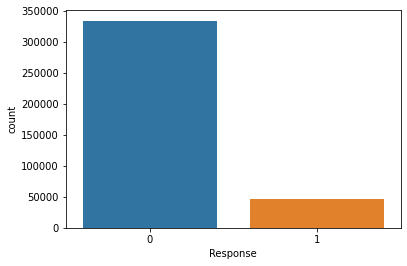

In [18]:
#count of 
sns.countplot(data["Response"])

As we can see there is high imbalnce in the responses data and we need to treat this data dor processing, else it won't provide us with accurate results.

Let's try to do some univariate analysis

By looking into the data we can state that following columns are categorical
* Gender
* Driving_License
* Previously_Insured
* Vehicle_Age
* Vehicle_Damage

In [19]:
data1 = data.copy()

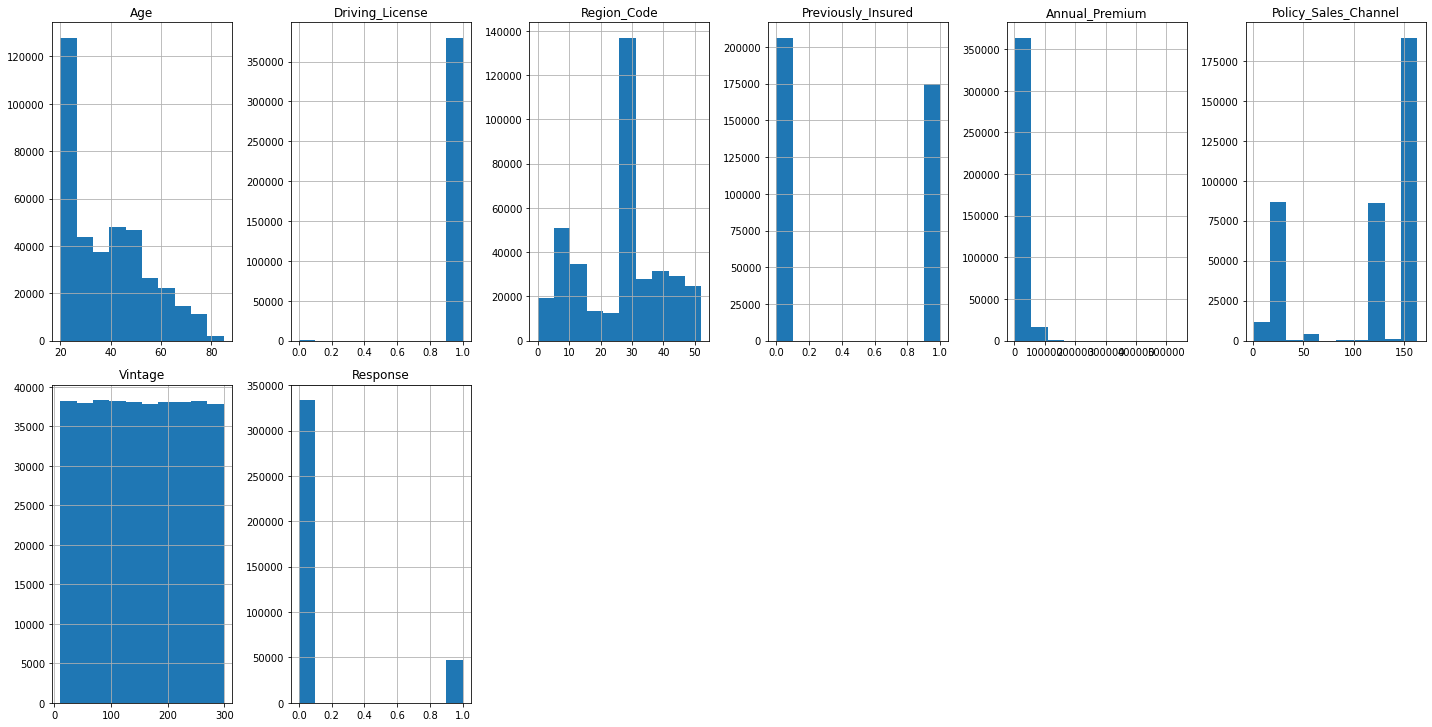

In [20]:
data.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.show()

Few of the important observations that can be found over here:
* Age column is right skewed
* Response column is highly imbalanced column, we will try to implement SMOTE techniques further
* Driving License is also very highly imbalanced column, we will delete this column further in our code





In [21]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold')
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold')


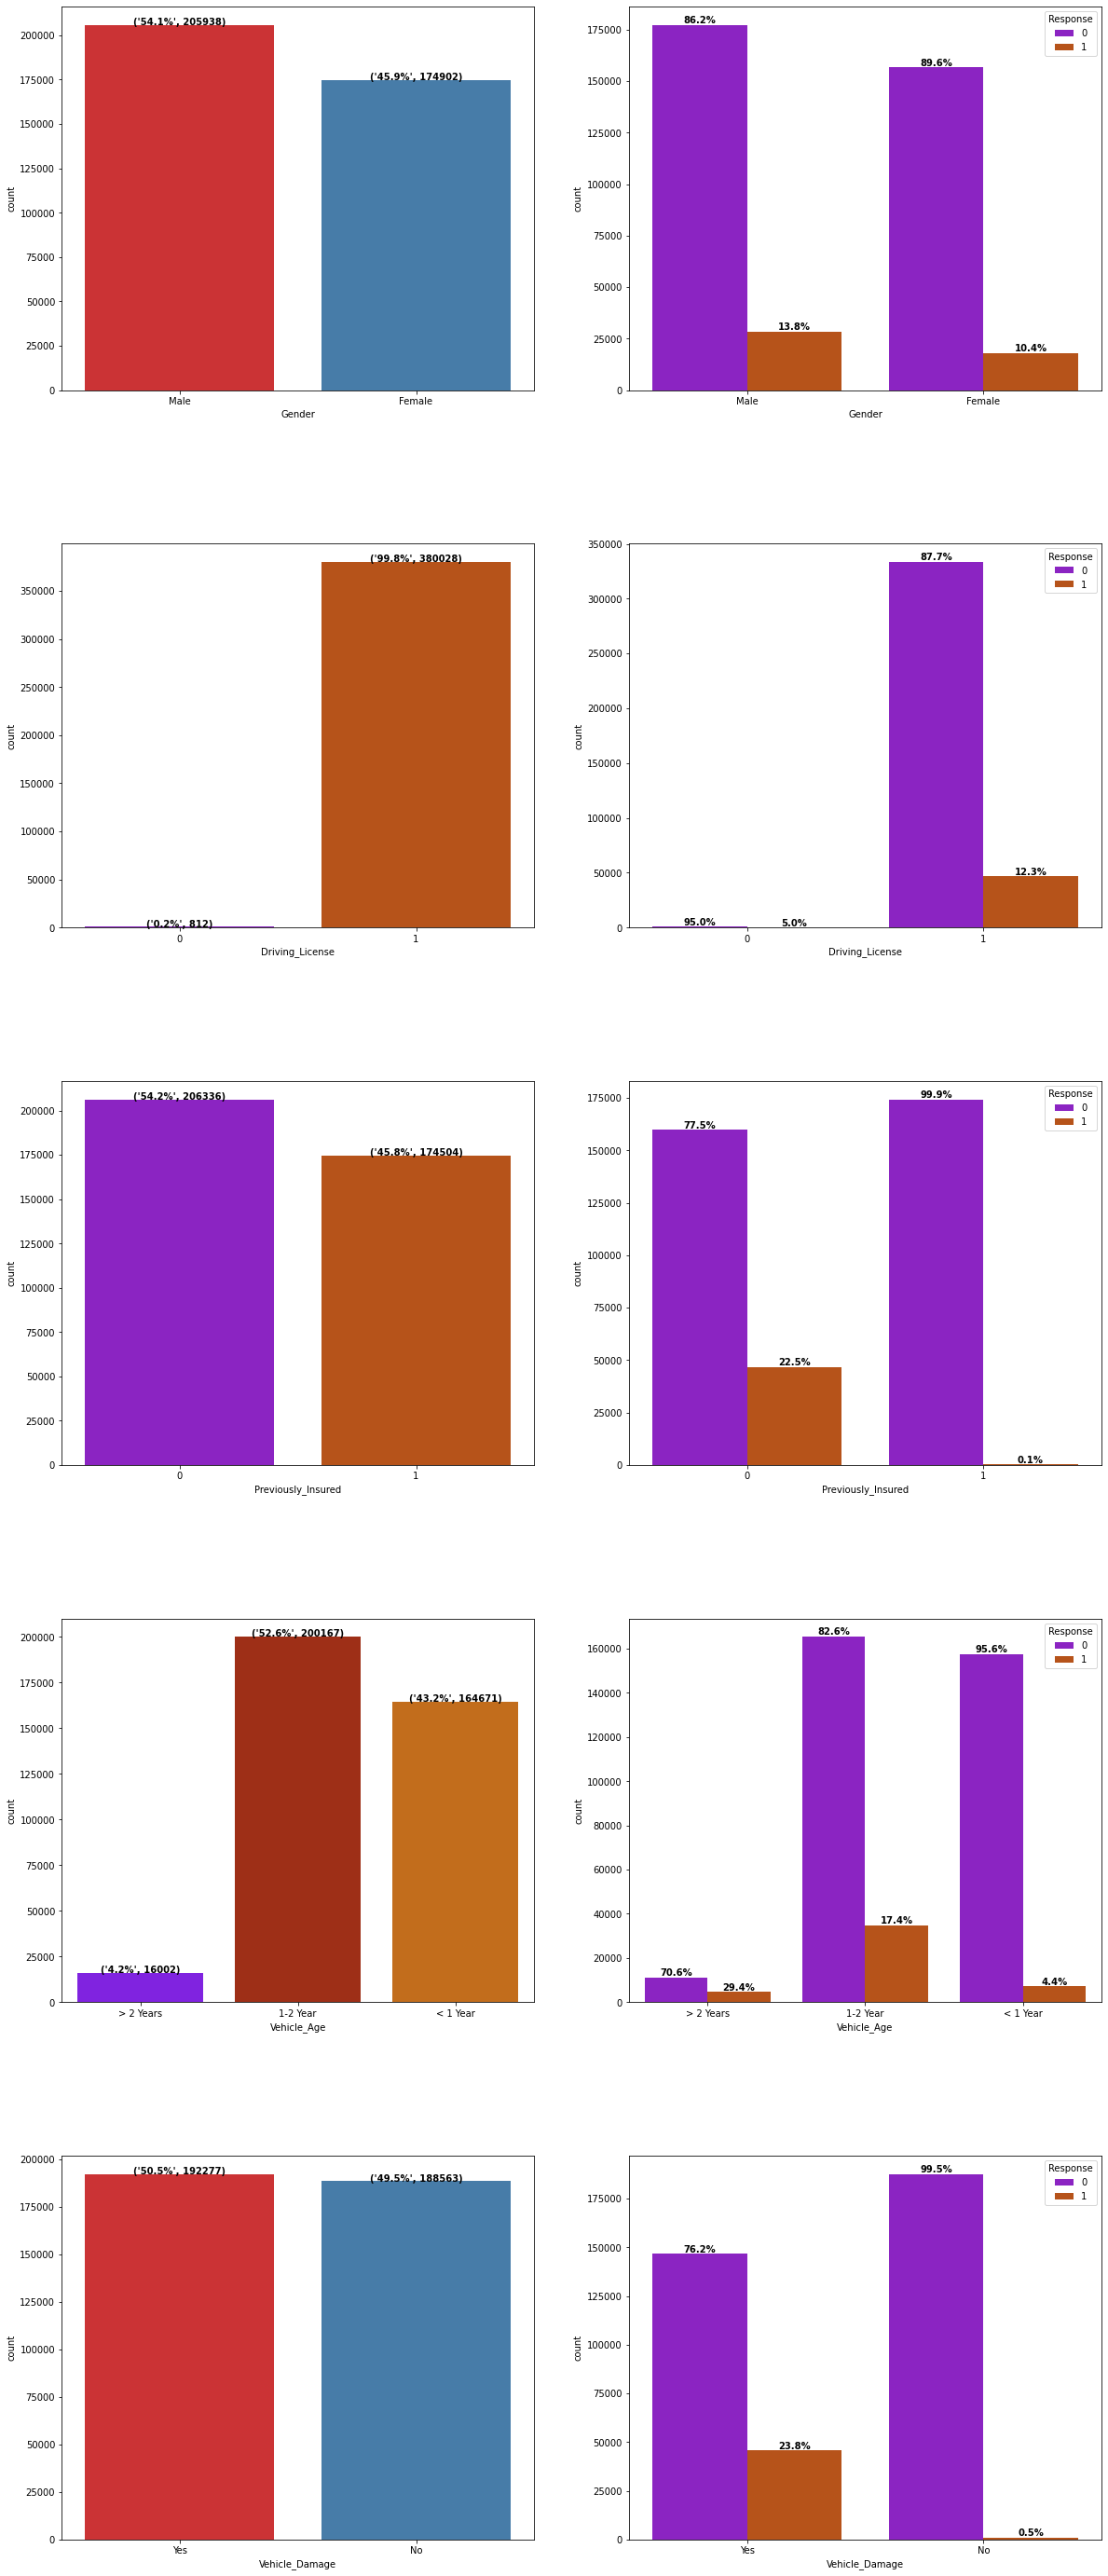

In [22]:
f,ax=plt.subplots(nrows=5,ncols=2,figsize=(20,50), 
                  gridspec_kw={'width_ratios': [10,10],
                               'height_ratios': [10,10,10,10,10],'wspace': 0.2,
                       'hspace': 0.4})


a1=sns.countplot(data=data,x="Gender",ax=ax[0][0],palette="Set1")
without_hue(data,'Gender',a1)
a2=sns.countplot(data=data,x='Gender',hue='Response',palette="gnuplot",ax=ax[0][1])
with_hue(data,'Gender',a2)

b1=sns.countplot(data=data,x="Driving_License",palette="gnuplot",ax=ax[1][0])
without_hue(data,"Driving_License",b1)
b2=sns.countplot(data=data,x="Driving_License",hue='Response',palette="gnuplot",ax=ax[1][1])
with_hue(data,"Driving_License",b2)

c1=sns.countplot(data=data,x="Previously_Insured",palette="gnuplot",ax=ax[2][0])
without_hue(data,"Previously_Insured",c1)
c2=sns.countplot(data=data,x="Previously_Insured",hue='Response',palette="gnuplot",ax=ax[2][1])
with_hue(data,"Previously_Insured",c2)

d1=sns.countplot(data=data,x="Vehicle_Age",palette="gnuplot",ax=ax[3][0])
without_hue(data,"Vehicle_Age",d1)
d2=sns.countplot(data=data,x="Vehicle_Age",hue='Response',palette="gnuplot",ax=ax[3][1])
with_hue(data,"Vehicle_Age",d2)

e1=sns.countplot(data=data,x="Vehicle_Damage",ax=ax[4][0],palette="Set1")
without_hue(data,"Vehicle_Damage",e1)
e2=sns.countplot(data=data,x="Vehicle_Damage",hue='Response',palette="gnuplot",ax=ax[4][1])
with_hue(data,"Vehicle_Damage",e2)

Few **insights** can be drawn as:
* Male are norrowly more interested in taking can insurance: 13.4% vs 10.8%
* People with Driving license would be more interested in taking Motor Insurance
* As expected, people who don't have motor insurance are more interested in taking motor insurance
* More number of vehicles have age less than 2 years
* People with motor having age between 1 to 2 year are more interested in taking Motor Insurance
* Customers having their Vehicle damaged are more suspectible to take motor insurance

**Numerical Variables**<BR>
Let's try to look into the Numerical Variables and their distributions

In [23]:
data.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [24]:
# Identifying Numerical columns
numeric_cols = ["Age","Region_Code","Annual_Premium","Vintage"]
numeric_cols

['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

In [25]:
# Identifying Categorical columns
categorical_cols = ['Gender','Driving_License','Region_Code', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']
categorical_cols

['Gender',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Policy_Sales_Channel']

Drawing few Box-plots 

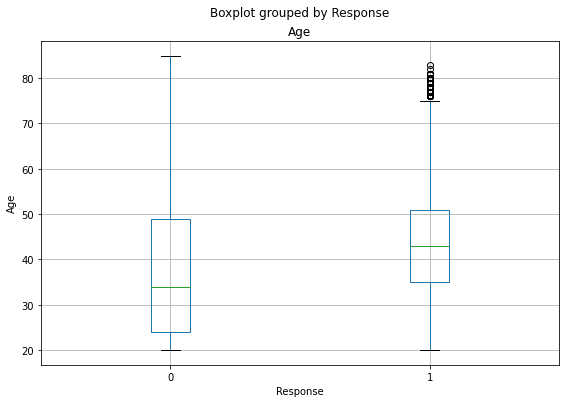

In [26]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
data.boxplot(column = 'Age', by = 'Response', ax = ax)
ax.set_ylabel("Age")
plt.show()

In [27]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


**Outlier Treatment** <BR>
Checking outliers for numerical columns

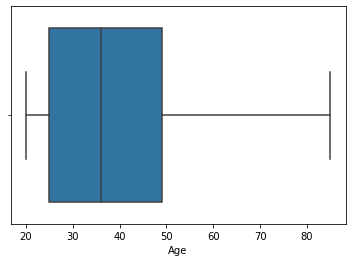

In [28]:
# Age
sns.boxplot(data['Age'])

So there doesn't seem to be any outlier present in the Age column of the dataset

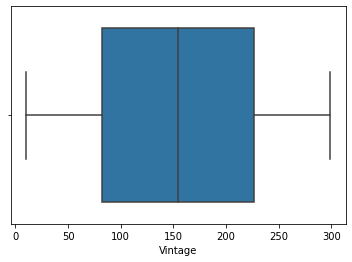

In [29]:
# Vintage
sns.boxplot(data['Vintage'])

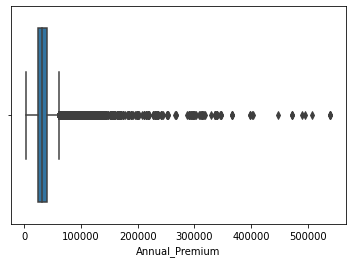

In [30]:
# Annual Premium
sns.boxplot(data["Annual_Premium"])

We can observe that there are large number of outliers present in Annual Premium as the data is rightly skewed. However we will turn this data into bins and make the data as discrete

In [31]:
# find Quartile ranges
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print(IQR,lower_range, upper_range)

Age                        24.0
Driving_License             0.0
Region_Code                20.0
Previously_Insured          1.0
Annual_Premium          14982.0
Policy_Sales_Channel      123.0
Vintage                   145.0
Response                    0.0
dtype: float64 Age                      -11.0
Driving_License            1.0
Region_Code              -15.0
Previously_Insured        -1.5
Annual_Premium          1953.0
Policy_Sales_Channel    -155.5
Vintage                 -135.5
Response                   0.0
dtype: float64 Age                        85.0
Driving_License             1.0
Region_Code                65.0
Previously_Insured          2.5
Annual_Premium          61881.0
Policy_Sales_Channel      336.5
Vintage                   444.5
Response                    0.0
dtype: float64


In [32]:
# Adjusting Annual_Premium outliers
data['Annual_Premium']=np.where(data['Annual_Premium']> 61881.0,61881.0,data['Annual_Premium'])

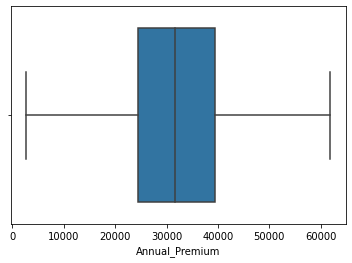

In [33]:
# Again plotting Annual Premium boxplot
sns.boxplot(data["Annual_Premium"])

### Data Cleaning

In [34]:
# Converting Vehicle Damage from Yes and No into 0 and 1 respectively
data['Vehicle_Damage'] = data['Vehicle_Damage'].apply(lambda x : 1 if x == "Yes" else 0)

In [35]:
# Converting Male and Female in Gender column to 0 and 1 respectively
data['Gender'] = data['Gender'].apply(lambda x : 1 if x == "Female" else 0)

In [36]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [37]:
data.Region_Code.unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

From above we know that there are 3 categories present in the column "Vehicle Age". We need to do one-hot encoding on the same.

In [38]:
# one-hot encoding
data = pd.get_dummies(data,columns=["Vehicle_Age"])

In [39]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,1,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,0,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,0,47,1,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,0,21,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,1,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0


Before we also saw that, column name "Driving_License" was very highly imbalanced. So we can go ahead and delete that column

In [40]:
data.drop(labels="Driving_License",axis=1,inplace=True)

In [41]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,44,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,0,76,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,0,47,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,0,21,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,1,29,41.0,1,0,27496.0,152.0,39,0,0,1,0


### Feature Engineering
We can observe that columns: Age, Annual_Premium,Region_Code and Policy_Sales_Channel are also categorical columns. <br>
Since they include vast number of classes we need to treat them.
<BR>
For Age and Annual premium, they are continous numerical variables. So we will try the **Discretisation** of continuous variables using Decision Tree

In [42]:
# splitting the data into train and test so that we can fit them into a Decision Tree
X = data.loc[:,["Age","Annual_Premium","Response"]]
y = data.loc[:,["Response"]]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 ,random_state = 2)

In [44]:
# Age Column
#v Fitting the Decision Tree
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Age.to_frame(),y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
## Calculating the probability
x_train['Age_tree']=dtree.predict_proba(x_train.Age.to_frame())[:,1]

In [46]:
x_train.head()

,Age,Annual_Premium,Response,Age_tree
349224,45,41247.0,0,0.199556
243603,21,44182.0,0,0.036407
41286,28,27404.0,0,0.082685
191,24,28190.0,0,0.036407
49920,32,28873.0,0,0.199556


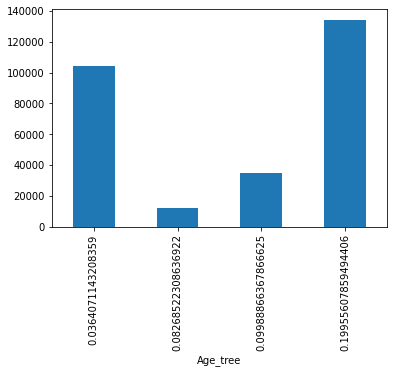

In [47]:
# checking the no of customer per bin
x_train.groupby('Age_tree')['Response'].count().plot.bar()

In [48]:
# Now we will try to use this predicted probablity to create bins
age_limit = pd.DataFrame({"Min_Age": x_train.groupby("Age_tree")["Age"].min(),"Max_Age": x_train.groupby("Age_tree")["Age"].max()})

In [49]:
age_limit

,Min_Age,Max_Age
Age_tree,,
0.036407,20,27
0.082685,28,29
0.099889,60,85
0.199556,30,59


As we can see Age can be divided into 4 bins. Now we will replace it with the bins: 1,2,3,4

In [50]:
data.loc[(data['Age']>=20) & (data['Age']<28),'Age']=1 ## Just starting out
data.loc[(data['Age']>=28) & (data['Age']<30),'Age']=2 ## Young Ppl
data.loc[(data['Age']>=30) & (data['Age']<60),'Age']=3 ## Mid-Age Ppl
data.loc[(data['Age']>=60) & (data['Age']<=85),'Age']=4 ## Old Age

In [51]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,3,28.0,0,1,40454.0,26.0,217,1,0,0,1
1,0,4,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,0,3,28.0,0,1,38294.0,26.0,27,1,0,0,1
3,0,1,11.0,1,0,28619.0,152.0,203,0,0,1,0
4,1,2,41.0,1,0,27496.0,152.0,39,0,0,1,0


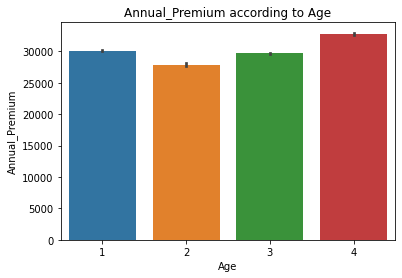

In [52]:
#Age vs Annual Premium
sns.barplot(data['Age'],data['Annual_Premium'])
plt.title('Annual_Premium according to Age')
plt.show()

As expected, we can observe the senior citizen have to pay the highest Annual Premium.
<br>
now we will try to do the same for "Annual Premium"

In [53]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(x_train.Annual_Premium.to_frame(),y_train)

x_train['Annual_Premium_tree']=tree.predict_proba(x_train.Annual_Premium.to_frame())[:,1]


In [54]:
x_train['Annual_Premium_tree'].unique()

array([0.13467876, 0.15037068, 0.10545783, 0.13209884])

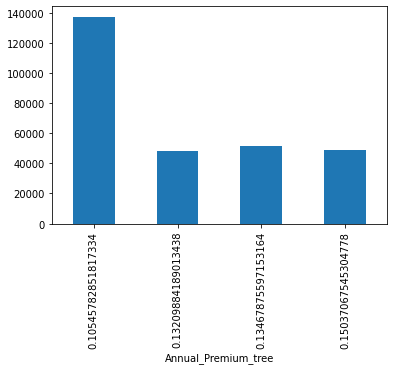

In [55]:
## checking no of customer per bin
x_train.groupby('Annual_Premium_tree')['Response'].count().plot.bar()

In [56]:
Annual_Premium_tree_limit=pd.concat([x_train.groupby('Annual_Premium_tree')['Annual_Premium'].min(),x_train.groupby('Annual_Premium_tree')['Annual_Premium'].max()],axis=1)
Annual_Premium_tree_limit

,Annual_Premium,Annual_Premium
Annual_Premium_tree,,
0.105458,10004.0,35923.0
0.132099,2630.0,9816.0
0.134679,35924.0,43343.0
0.150371,43344.0,61881.0


In [57]:
data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9817.0),'Annual_Premium']=0
data.loc[(data['Annual_Premium']>=9817.0) & (data['Annual_Premium']<35924.0),'Annual_Premium']=1
data.loc[(data['Annual_Premium']>=35924.0) & (data['Annual_Premium']<43344.0),'Annual_Premium']=2
data.loc[(data['Annual_Premium']>=43344.0) & (data['Annual_Premium']<=540165.0),'Annual_Premium']=3

In [58]:
# taking new look at the data
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,3,28.0,0,1,2.0,26.0,217,1,0,0,1
1,0,4,3.0,0,0,1.0,26.0,183,0,1,0,0
2,0,3,28.0,0,1,2.0,26.0,27,1,0,0,1
3,0,1,11.0,1,0,1.0,152.0,203,0,0,1,0
4,1,2,41.0,1,0,1.0,152.0,39,0,0,1,0


In [59]:
# doing one hot encoding for Annual Premium and Age
data = pd.get_dummies(data,columns=["Age","Annual_Premium"])

In [60]:
data.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age_1,Age_2,Age_3,Age_4,Annual_Premium_0.0,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,0,28.0,0,1,26.0,217,1,0,0,1,0,0,1,0,0,0,1,0
1,0,3.0,0,0,26.0,183,0,1,0,0,0,0,0,1,0,1,0,0
2,0,28.0,0,1,26.0,27,1,0,0,1,0,0,1,0,0,0,1,0
3,0,11.0,1,0,152.0,203,0,0,1,0,1,0,0,0,0,1,0,0
4,1,41.0,1,0,152.0,39,0,0,1,0,0,1,0,0,0,1,0,0


In [61]:
data["Region_Code"].value_counts()

28.0    106335
8.0      33857
46.0     19747
41.0     18256
15.0     13300
30.0     12177
29.0     11052
50.0     10237
3.0       9245
11.0      9229
36.0      8788
33.0      7647
47.0      7434
35.0      6939
6.0       6277
45.0      5603
37.0      5501
18.0      5150
14.0      4677
48.0      4654
39.0      4642
10.0      4372
21.0      4266
2.0       4037
13.0      4034
7.0       3275
12.0      3197
9.0       3101
27.0      2819
32.0      2784
43.0      2639
17.0      2616
26.0      2587
25.0      2502
24.0      2415
38.0      2026
0.0       2015
16.0      2005
23.0      1959
31.0      1948
20.0      1931
49.0      1831
4.0       1798
34.0      1663
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1006
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

In [62]:
# looking for the possibility to encoding on region codes depending upon the frequency
data["Region_Code"].value_counts(normalize=True) * 100

28.0    27.921174
8.0      8.890085
46.0     5.185117
41.0     4.793614
15.0     3.492280
30.0     3.197406
29.0     2.902006
50.0     2.688005
3.0      2.427529
11.0     2.423327
36.0     2.307531
33.0     2.007930
47.0     1.952001
35.0     1.822025
6.0      1.648199
45.0     1.471222
37.0     1.444439
18.0     1.352274
14.0     1.228075
48.0     1.222036
39.0     1.218885
10.0     1.147989
21.0     1.120155
2.0      1.060025
13.0     1.059237
7.0      0.859941
12.0     0.839460
9.0      0.814253
27.0     0.740206
32.0     0.731016
43.0     0.692942
17.0     0.686903
26.0     0.679288
25.0     0.656969
24.0     0.634125
38.0     0.531982
0.0      0.529094
16.0     0.526468
23.0     0.514389
31.0     0.511501
20.0     0.507037
49.0     0.480779
4.0      0.472114
34.0     0.436666
19.0     0.403056
22.0     0.343714
40.0     0.340038
5.0      0.335837
1.0      0.264153
44.0     0.212163
42.0     0.155183
52.0     0.070108
51.0     0.048052
Name: Region_Code, dtype: float64

Since we don't have information regarding Business case for Policy_Sales_Channel. So we will keep it in the same form

In [63]:
len(data["Policy_Sales_Channel"].unique())

155

In [64]:
data.groupby("Policy_Sales_Channel")["Response"].mean()

Policy_Sales_Channel
1.0      0.032588
2.0      0.250000
3.0      0.304015
4.0      0.200393
6.0      0.000000
           ...   
157.0    0.268384
158.0    0.274390
159.0    0.019608
160.0    0.021820
163.0    0.304183
Name: Response, Length: 155, dtype: float64

In [65]:
# Mean Encoding
# Here we are trying to group Policy_Sales_Channel through mean interest of customers
Policy_Sales_Channel_me = data.groupby("Policy_Sales_Channel")["Response"].mean()
def mean_encoding(dataset) :
    
    op_set = (dataset.assign( Policy_Sales_Channel = dataset.Policy_Sales_Channel.replace(Policy_Sales_Channel_me.index, Policy_Sales_Channel_me.values) ))
    return op_set

In [66]:
data = mean_encoding(data)
data.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age_1,Age_2,Age_3,Age_4,Annual_Premium_0.0,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,0,28.0,0,1,0.199395,217,1,0,0,1,0,0,1,0,0,0,1,0
1,0,3.0,0,0,0.199395,183,0,1,0,0,0,0,0,1,0,1,0,0
2,0,28.0,0,1,0.199395,27,1,0,0,1,0,0,1,0,0,0,1,0
3,0,11.0,1,0,0.028646,203,0,0,1,0,1,0,0,0,0,1,0,0
4,1,41.0,1,0,0.028646,39,0,0,1,0,0,1,0,0,0,1,0,0


Cheking if there is any outlier present in Vintage column

Text(0, 0.5, 'Vintage')

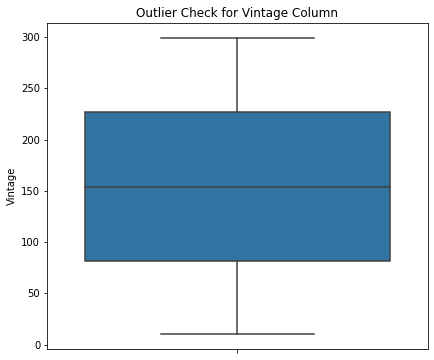

In [67]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.boxplot(y=data["Vintage"])
fig.set_title('Outlier Check for Vintage Column')
fig.set_ylabel("Vintage")

In [68]:
# scaling Vintage column
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()
# transform data
data["Vintage"] = scaler.fit_transform(data[["Vintage"]])

In [69]:
data.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age_1,Age_2,Age_3,Age_4,Annual_Premium_0.0,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,0,28.0,0,1,0.199395,0.716263,1,0,0,1,0,0,1,0,0,0,1,0
1,0,3.0,0,0,0.199395,0.598616,0,1,0,0,0,0,0,1,0,1,0,0
2,0,28.0,0,1,0.199395,0.058824,1,0,0,1,0,0,1,0,0,0,1,0
3,0,11.0,1,0,0.028646,0.667820,0,0,1,0,1,0,0,0,0,1,0,0
4,1,41.0,1,0,0.028646,0.100346,0,0,1,0,0,1,0,0,0,1,0,0


### Multivariate Analysis
Let's try to do some Multivariate Analysis.

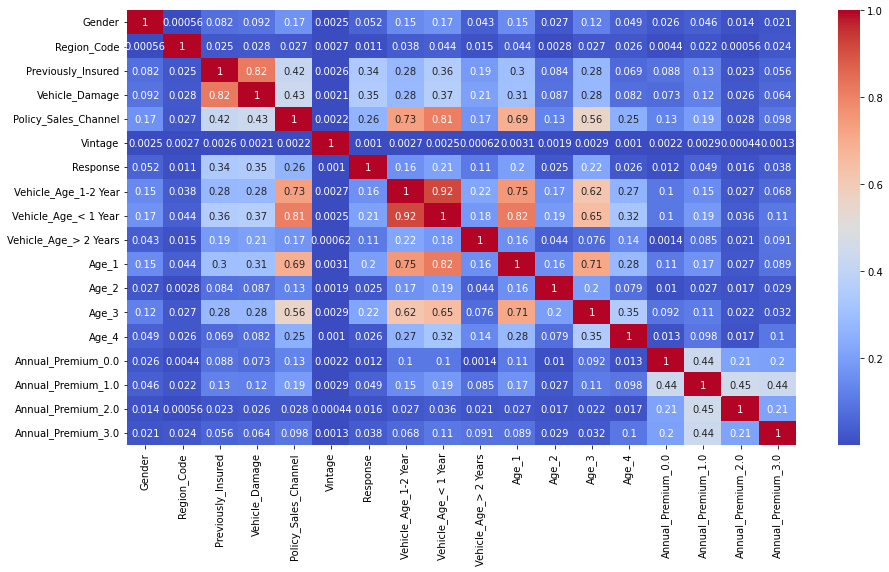

In [70]:
#Correlation matrix
corr=data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(abs(corr),annot=True,cmap="coolwarm")

As we can observe that there is strong relationship between Vehicle Damage and Previously insured

Let's try to find out which categorical values are of utmost importance.
<BR>
We will try to apply Chi-Square test

In [71]:
# Chi2 Test
from sklearn.feature_selection import chi2
predictor = data[['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0']]
dependent = data["Response"]
chi_scores = chi2(predictor,dependent)
chi_scores

(array([  567.1009911 ,   282.96263157, 24021.242368  , 23686.86368435,
         4875.82504363,  9518.41947355,  4356.93689078,  9653.47005222,
          230.51263116,  9762.02794997,   227.99085528,    45.34019351,
          481.64110448,    78.03408831,   446.44694845]),
 array([2.39845642e-125, 1.69824091e-063, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        4.60836433e-052, 0.00000000e+000, 1.63497733e-051, 1.65615179e-011,
        9.38953874e-107, 1.01277603e-018, 4.27922037e-099]))

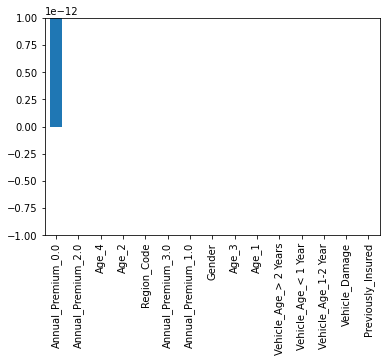

In [72]:
# determining p-values so that we can find the important features
p_values = pd.Series(chi_scores[1],index = predictor.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

As we can observe, p-values of all the variables are less. hence we can use them in model training purposes

### Model Fitting
**Handling Class Imbalance: SMOTE**

In [73]:
data.columns

Index(['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0'],
      dtype='object')

In [74]:
# Reaarranging columns
data =data[['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0', 'Response']]

In [75]:
data.head() # Confirming with first 5 rows

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Age_1,Age_2,Age_3,Age_4,Annual_Premium_0.0,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0,Response
0,0,28.0,0,1,0.199395,0.716263,0,0,1,0,0,1,0,0,0,1,0,1
1,0,3.0,0,0,0.199395,0.598616,1,0,0,0,0,0,1,0,1,0,0,0
2,0,28.0,0,1,0.199395,0.058824,0,0,1,0,0,1,0,0,0,1,0,1
3,0,11.0,1,0,0.028646,0.667820,0,1,0,1,0,0,0,0,1,0,0,0
4,1,41.0,1,0,0.028646,0.100346,0,1,0,0,1,0,0,0,1,0,0,0


In [76]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['Response'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 380840
Resampled dataset shape 668310


So, here we produced the resampled data set using "SMOTE" technique. Now we will try to use various Modelling techniques to model our dataset

In [77]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.25, random_state = 3)

We will start with Logistic Regression as our baseline model and then will further advance to other models
<br>
<br>
**Logistic Regression**

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [79]:
# Fitting the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
# Predicting on training and test dataset
log_ytrain_predict = log_model.predict(X_train)
log_ytest_predict = log_model.predict(X_test)

In [81]:
# Model Evaluation: Training Set
# Accuracy - Training Data
log_model.score(X_train, y_train)

0.7959826986305742

AUC: 0.846


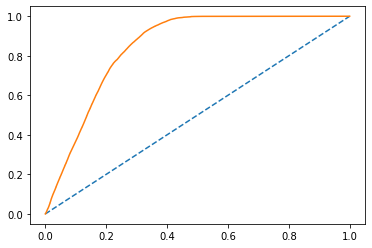

In [82]:
# AUC-ROC for training dataset
# predict probabilities
probs = log_model.predict_proba(X_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
# Now checking accuracy for the test data
log_model.score(X_test,y_test)

0.7982319635140473

AUC: 0.847


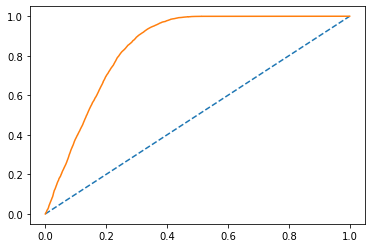

In [ ]:
# AUC-ROC for test dataset
# predicting probablities
probs = log_model.predict_proba(X_test)
#keeping probablities for positive outcomes only
probs = probs[:,1]
# calc AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" % auc)
# calculate ROC curve
test_fpr,test_tpr, test_thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1], linestyle = '--')
# plot the roc curve of the model
plt.plot(test_fpr,test_tpr)


**Confusion Matrix**

In [ ]:
# Confusion Matrix
confusion_matrix(y_train,log_ytrain_predict)

array([[171069,  79482],
       [ 21761, 228920]])

In [ ]:
# Classification Report
print(classification_report(y_train,log_ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77    250551
           1       0.74      0.91      0.82    250681

    accuracy                           0.80    501232
   macro avg       0.81      0.80      0.80    501232
weighted avg       0.81      0.80      0.80    501232



In [ ]:
# Confusion Matrix for test data
confusion_matrix(y_test,log_ytest_predict)

array([[57125, 26479],
       [ 7232, 76242]])

In [ ]:
# Classification Report for Test
print(classification_report(y_test,log_ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     83604
           1       0.74      0.91      0.82     83474

    accuracy                           0.80    167078
   macro avg       0.81      0.80      0.80    167078
weighted avg       0.81      0.80      0.80    167078



Given Accuracy scores and AUC scores, we can conclude that our data is neither over-fitting nor under-fitting.
<BR>
Accuracy is around 80% for both data
<BR>
Looking at the Precision, we can observe that it is 90% for Class 0 for both train and test datasets. However, it is bit on the lowerside for Class 1 for both datasets. <BR>
Recall value for Class 1 is around 92% for both datasets, which could mean that there are less chances that we will be missing our potential customers.
<BR>
f1-score is around 80%, means that our modelling is okay and we are able to predict good amount of cases correctly.
<BR>
Now, let's try this with some Hyper-Parameter tuning

In [ ]:
# importing libraries
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
log_cv_ht_model = LogisticRegression()
solvers = ['newton-cg']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search_log = GridSearchCV(estimator=log_cv_ht_model, param_grid=grid, n_jobs=-1, cv=5, scoring='roc_auc',error_score=0, verbose=2)
grid_result = grid_search_log.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.5min finished


In [ ]:
logistic_model_optimal_model = grid_search_log.best_estimator_
logistic_model_optimal_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
grid_search_log.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
grid_search_log.best_score_

0.8469928162474147

Predicting test and train set with best fitted model

In [ ]:
log_train_preds =  logistic_model_optimal_model.predict(X_train)
log_test_preds = logistic_model_optimal_model.predict(X_test)

In [ ]:
# Model Evaluation: Training Set
# Accuracy - Training Data
logistic_model_optimal_model.score(X_train, y_train)

0.7977583234909184

AUC: 0.847


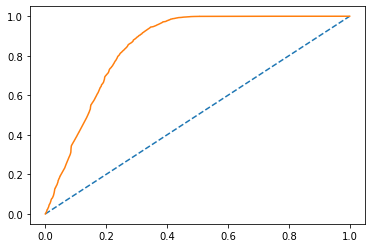

In [ ]:
# AUC-ROC for training dataset
# predict probabilities
probs = logistic_model_optimal_model.predict_proba(X_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
# Confusion Matrix
confusion_matrix(y_train,log_train_preds)

array([[170844,  79707],
       [ 21663, 229018]])

In [ ]:
# Classification Report
print(classification_report(y_train,log_train_preds))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77    250551
           1       0.74      0.91      0.82    250681

    accuracy                           0.80    501232
   macro avg       0.81      0.80      0.79    501232
weighted avg       0.81      0.80      0.80    501232



In [ ]:
# Confusion Matrix for test data
confusion_matrix(y_test,log_test_preds)

array([[57041, 26563],
       [ 7192, 76282]])

In [ ]:
# Classification Report
print(classification_report(y_test,log_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77     83604
           1       0.74      0.91      0.82     83474

    accuracy                           0.80    167078
   macro avg       0.81      0.80      0.80    167078
weighted avg       0.81      0.80      0.80    167078



After doing hyper-parameter tuning for Logistic Regression, we don't see much difference in the scores. However, our precision for class 0 got slightly improved. <br>
Recall values for class 1 is again around 92%, suggesting that less chances that potential customer for Motor Insurance will be left by us for targetting purposes. <BR>
F1 score remains around 80%. However, there is lot of room for improvement.

**Decision Tree**
<BR>
Now we will try to build basic decision tree model

In [ ]:
# decision tree fitting
DT_Classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
DT_Classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# predictions
dt_ytrain_pred = DT_Classifier.predict(X_train)
dt_ytest_pred = DT_Classifier.predict(X_test)

In [ ]:
# Model Evaluation: Training Set
# Accuracy - Training Data
DT_Classifier.score(X_train, y_train)

0.8082943626903311

In [ ]:
# Calculating roc_auc score on train set
roc_auc_score(y_train,dt_ytrain_pred)

0.8082721828862651

In [ ]:
# Calculating roc_auc score on test set
roc_auc_score(y_test,dt_ytest_pred)

0.8086171207563138

AUC: 0.865


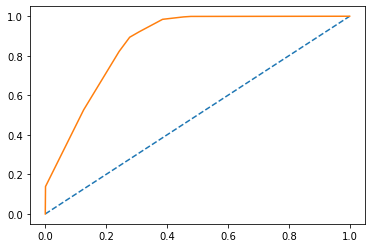

In [ ]:
# AUC-ROC for training dataset
# predict probabilities
probs = DT_Classifier.predict_proba(X_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

In [ ]:
# Now checking accuracy for the test data
DT_Classifier.score(X_test,y_test)

0.8085504973724847

AUC: 0.866


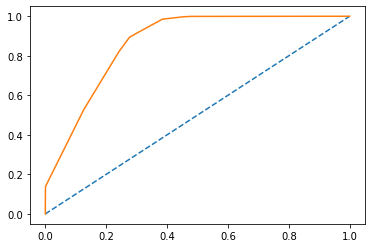

In [ ]:
# AUC-ROC for test dataset
# predicting probablities
probs = DT_Classifier.predict_proba(X_test)
#keeping probablities for positive outcomes only
probs = probs[:,1]
# calc AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" % auc)
# calculate ROC curve
test_fpr,test_tpr, test_thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1], linestyle = '--')
# plot the roc curve of the model
plt.plot(test_fpr,test_tpr)


Confusion Matrix

In [ ]:
# Confusion Matrix
confusion_matrix(y_train,dt_ytrain_pred)

array([[181087,  69464],
       [ 26625, 224056]])

In [ ]:
# Classification Report
print(classification_report(y_train,dt_ytrain_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79    250551
           1       0.76      0.89      0.82    250681

    accuracy                           0.81    501232
   macro avg       0.82      0.81      0.81    501232
weighted avg       0.82      0.81      0.81    501232



In [ ]:
# Confusion Matrix Test
confusion_matrix(y_test,dt_ytest_pred)

array([[60445, 23159],
       [ 8828, 74646]])

In [ ]:
# Classification Report: Test
print(classification_report(y_test,dt_ytest_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79     83604
           1       0.76      0.89      0.82     83474

    accuracy                           0.81    167078
   macro avg       0.82      0.81      0.81    167078
weighted avg       0.82      0.81      0.81    167078



In this case, recall values of class 1 slightly further improved in comparision to logistic regression. F1 scores are also on higher side. However, the prediction metrices of class 0 are still on the lower side.

Now we will try to do some Hyper parameter tuning to improve results

In [ ]:
# Hyperparameter tuning

dt_tuned_model = DecisionTreeClassifier() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[5, 7, 10]}
random_forest_model = GridSearchCV(dt_tuned_model, param_grid = grid_values, scoring = "roc_auc", cv=5)

# Fit the object to train dataset
dt_tuned_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predicting on both train and test dataset using the fitted model
dt_train_preds =  dt_tuned_model.predict(X_train)
dt_test_preds  = dt_tuned_model.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(y_train,dt_train_preds)

0.9706144061033614

In [ ]:
# Obtain accuracy on test set
accuracy_score(y_test,dt_test_preds)

0.8626749183016316

In [ ]:
# Calculating roc_auc score on train set
roc_auc_score(y_train,dt_train_preds)

0.9706138219988689

In [ ]:
# Calculating roc_auc score on test set
roc_auc_score(y_test,dt_test_preds)

0.862674928303627

As we can observe that our data is clearly overfit, after applying Hyper-parameter tuning. However, there was no overfitting observed initally when no hyper parameter tuning was performed

**Random Forest**

In [ ]:
# Hyperparameter tuning with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier() 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[7, 10]}
rf_classifier = GridSearchCV(rf_classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5, verbose =2)

# Fit the object to train dataset
rf_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] max_depth=7, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=7, n_estimators=50, total=  13.3s
[CV] max_depth=7, n_estimators=50 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] ..................... max_depth=7, n_estimators=50, total=  13.1s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ..................... max_depth=7, n_estimators=50, total=  13.1s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ..................... max_depth=7, n_estimators=50, total=  13.4s
[CV] max_depth=7, n_estimators=50 ....................................
[CV] ..................... max_depth=7, n_estimators=50, total=  14.0s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=  22.0s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=  22.6s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] ..................... max_depth=7, n_estimators=80, total=  21.8s
[CV] max_depth=7, n_estimators=80 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 12.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_optimal_model = rf_classifier.best_estimator_

In [ ]:
rf_optimal_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Parameters
rf_classifier.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [ ]:
# Score
rf_classifier.best_score_

0.8898274359237138

In [ ]:
# Prediction
rf_train_preds = rf_optimal_model.predict(X_train)
rf_test_preds = rf_optimal_model.predict(X_test)

In [ ]:
# Obtain accuracy on train set
accuracy_score(y_train,rf_train_preds)

0.8190797874038369

In [ ]:
# Obtain accuracy on test set
accuracy_score(y_test,rf_test_preds)

0.8189647948862208

In [ ]:
# Calculating roc_auc score on train set
roc_auc_score(y_train,rf_train_preds)

0.8190514217299703

In [ ]:
# Calculating roc_auc score on test set
roc_auc_score(y_test,rf_test_preds)

0.8190497917339559

Confusion Matrix

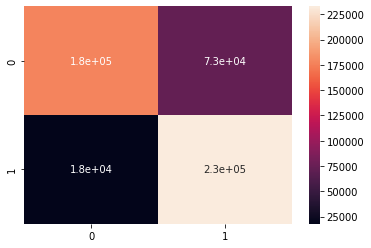

In [ ]:
# Obtain the confusion matrix on train set
sns.heatmap(confusion_matrix(y_train,rf_train_preds),annot=True)

In [ ]:
# Classification Report for train dataset
print(classification_report(y_train,rf_train_preds))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80    250551
           1       0.76      0.93      0.84    250681

    accuracy                           0.82    501232
   macro avg       0.84      0.82      0.82    501232
weighted avg       0.84      0.82      0.82    501232



AUC: 0.891


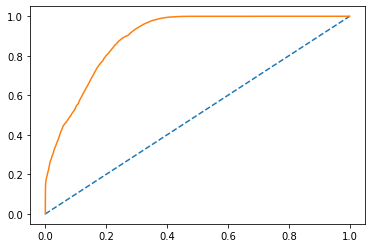

In [ ]:
# AUC-ROC for training dataset
# predict probabilities
probs = rf_optimal_model.predict_proba(X_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

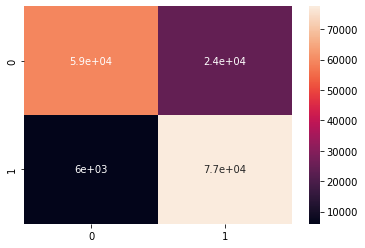

In [ ]:
# Obtain the confusion matrix on test set
sns.heatmap(confusion_matrix(y_test,rf_test_preds),annot=True)

In [ ]:
# Classification Report on test set
print(classification_report(y_test,rf_test_preds))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     83604
           1       0.76      0.93      0.84     83474

    accuracy                           0.82    167078
   macro avg       0.83      0.82      0.82    167078
weighted avg       0.84      0.82      0.82    167078



Evaluation Metrices improved after implementing Ramndom Forest. Both Precision and Recall Values improved for both train and test data sets.
F1-Scores are more than 80% for both classes. Along with that Recall values are 94% for Class 1 signifying that there are further less chances that a customer anticipated to take motor insurance will be missed.
<BR>
Moreover, looking at our datsets we can conclude that there is neither overfit nor nor underfit observed in our models.

AUC: 0.891


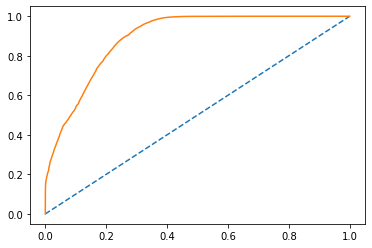

In [ ]:
# AUC-ROC for training dataset
# predict probabilities
probs = rf_optimal_model.predict_proba(X_test)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

As we can observe here that our model is neither overfit nor underfit

We will try to plot Variable Importance

In [ ]:
features = ['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0']
importances = rf_classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)

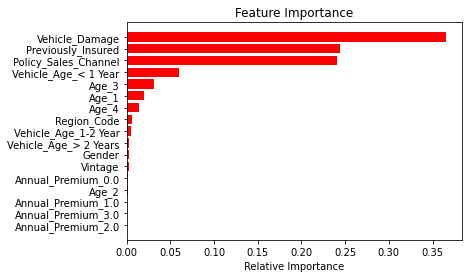

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

**Light GBM**

In [ ]:
# importing library
import lightgbm as lgb

In [ ]:
# Maximum depth of trees
max_depth = [8, 10]

# bagging fraction
bagging_fraction = [0.5, 0.6,0.7]

#max-bin
max_bin = [400, 500, 600]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'bagging_fraction':bagging_fraction, 'max_bin': max_bin}

param_dict

{'bagging_fraction': [0.5, 0.6, 0.7],
 'max_bin': [400, 500, 600],
 'max_depth': [8, 10]}

In [ ]:
# Creating Model of the LGBClassifier
LGB_model = lgb.LGBMClassifier()

# Grid search
LGB_grid = GridSearchCV(estimator = LGB_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'roc_auc')

LGB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] bagging_fraction=0.5, max_bin=400, max_depth=8 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... bagging_fraction=0.5, max_bin=400, max_depth=8, total=   5.5s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=8 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV] ... bagging_fraction=0.5, max_bin=400, max_depth=8, total=   5.4s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=400, max_depth=8, total=   5.4s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=10, total=   5.5s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=10, total=   5.5s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=10, total=   5.4s
[CV] bagging_fraction=0.5, max_bin=500, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=500, max_depth=8, total=   5.4s
[CV] bagging_fraction=0.5, max_bin=500, max_depth=8 ..................
[CV] ... bagging_fraction=0.5, max_bin=500, max_depth=8, total=   5.5s
[CV] bagging_fraction=0.5, max_bin=500, max_depth=8 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  4.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bagging_fraction': [0.5, 0.6, 0.7],
                         'max_bi

In [ ]:
# best score
LGB_grid.best_score_

0.9284240170481102

In [ ]:
# optimal model
optimal_model = LGB_grid.best_estimator_
optimal_model

LGBMClassifier(bagging_fraction=0.5, boosting_type='gbdt', class_weight=None,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_bin=600, max_depth=10, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
LGB_grid.best_params_

{'bagging_fraction': 0.5, 'max_bin': 600, 'max_depth': 10}

In [ ]:
# Prediction for train dataset
y_pred_train_LGB = optimal_model.predict(X_train) 
# Predictionfor test dataset  
y_pred_test_LGB = optimal_model.predict(X_test)     

In [ ]:
# accuracy train set
accuracy_score(y_train,y_pred_train_LGB)

0.8384700098956172

In [ ]:
# accuracy test set
accuracy_score(y_test,y_pred_test_LGB)

0.8380636588898598

In [ ]:
# Calculating roc_auc score on train set
roc_auc_score(y_train,y_pred_train_LGB)

0.8384478171154492

In [ ]:
# Calculating roc_auc score on test set
roc_auc_score(y_test,y_pred_test_LGB)

0.8381310685441544

Confusion Matrix along with Classification Reports

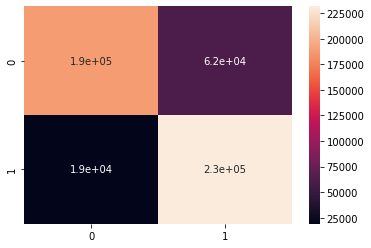

In [ ]:
# Obtain the confusion matrix on train set
sns.heatmap(confusion_matrix(y_train,y_pred_train_LGB),annot=True)

In [ ]:
# Classification Report
print(classification_report(y_train,y_pred_train_LGB))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82    250551
           1       0.79      0.92      0.85    250681

    accuracy                           0.84    501232
   macro avg       0.85      0.84      0.84    501232
weighted avg       0.85      0.84      0.84    501232



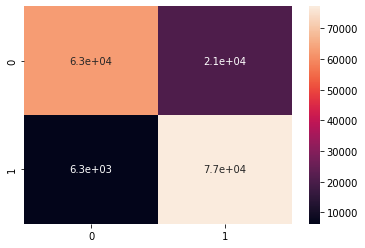

In [ ]:
# Obtain the confusion matrix on test set
sns.heatmap(confusion_matrix(y_test,y_pred_test_LGB), annot=True)

In [ ]:
# Classification Report
print(classification_report(y_test,y_pred_test_LGB))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82     83604
           1       0.79      0.92      0.85     83474

    accuracy                           0.84    167078
   macro avg       0.85      0.84      0.84    167078
weighted avg       0.85      0.84      0.84    167078



By looking at the results, it can be said that no underfitting or overfitting is being observed in our data. Precision of Class 0 has been increased along with recall values. Good Balance of F1 scores can be observed.

In [ ]:
# plotting for variable importance
features = ['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0']
importances = LGB_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)


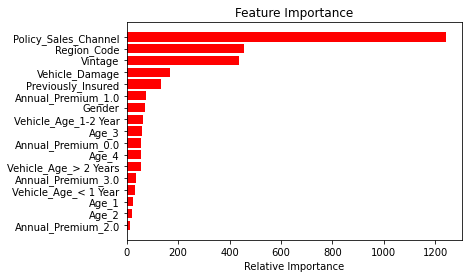

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

Unlike as in Random Forest Model, where there minimal importance of "Vintage", we can observe that in Light GBM, we have high importance of "Vintage" column

**Naive Bayes's**

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb_model = GaussianNB()

# Train the model using the training sets
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

In [ ]:
# accuracy scores train set

accuracy_score(y_train,y_train_pred)

0.7816480192804929

In [ ]:
# accuracy scores test set
accuracy_score(y_test,y_test_pred)

0.7825207388166007

As we can observe that there is no underfitting or overfitting observed in the data. <BR>
However, the scores are on the lower side

In [ ]:
#Import Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
nbm_model = MultinomialNB()

# Train the model using the training sets
nbm_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_train_pred = nbm_model.predict(X_train)
y_test_pred = nbm_model.predict(X_test)

In [ ]:
# accuracy scores train set

accuracy_score(y_train,y_train_pred)

0.7665651833881316

In [ ]:
# accuracy scores test set
accuracy_score(y_test,y_test_pred)

0.767832988185159

On using MultinomialNB, we can observe much lower scores for this case

In [ ]:
# defining grid search parameters
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# hyper-parameter tuning
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.9min finished


GaussianNB(priors=None, var_smoothing=0.0006579332246575676)


In [ ]:
nb_optimal = nbModel_grid.best_estimator_
nb_optimal

GaussianNB(priors=None, var_smoothing=0.0006579332246575676)

In [ ]:
nbModel_grid.best_score_

0.7862526786769937

In [ ]:
nbModel_grid.best_estimator_

GaussianNB(priors=None, var_smoothing=0.0006579332246575676)

In [ ]:
y_train_pred = nb_optimal.predict(X_train)
y_test_pred = nb_optimal.predict(X_test)

In [ ]:
# accuracy scores train set

accuracy_score(y_train,y_train_pred)

0.7862367127398091

In [ ]:
# accuracy scores test set
accuracy_score(y_test,y_test_pred)

0.7871233794993955

In [ ]:
# roc-auc
roc_auc_score(y_train,y_train_pred)

0.7862115799347638

In [ ]:
# roc-auc test
roc_auc_score(y_test,y_test_pred)

0.7871987636756624

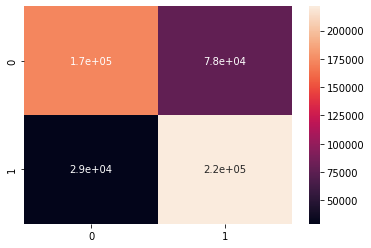

In [ ]:
# Obtain the confusion matrix on train set
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True)

**XG Boost**


In [83]:
# importing xgbm
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [84]:
# params
params = { 'max_depth': [6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500],
           }

In [85]:
xgbc = xgb.XGBClassifier()

In [86]:
clf = GridSearchCV(estimator=xgbc, 
                   param_grid=params,
                   scoring='roc_auc', cv=3, 
                   verbose=2)

In [87]:
# fit data
clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] learning_rate=0.01, max_depth=6, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_depth=6, n_estimators=100, total=  45.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   45.4s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=6, n_estimators=100, total=  45.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=100, total=  44.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total= 3.6min
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total= 3.6min
[CV] learning_rate=0.01, max_depth=6, n_estimators=500 ...............
[CV]  learning_rate=0.01, max_depth=6, n_estimators=500, total= 3.6min
[CV] learning_rate=0.01, max_depth=10, n_estimators=100 ..............
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100, total= 1.4min
[CV] learning_rate=0.01, max_depth=10, n_estimators=100 ..............
[CV]  learning_rate=0.01, max_depth=10, n_estimators=100, total= 1.4min
[CV] learning_rate=0.01, max_depth=10, n_estimators=100 ..............
[CV]

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 106.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [6, 10], 'n_estimators': [100, 500]},
             pre_dispatch='2*n_jobs', re

In [88]:
# optimal_model 
optimal_model = clf.best_estimator_
optimal_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [89]:
clf.best_score_

0.970163718664906

In [90]:
# predictions
y_train_pred = optimal_model.predict(X_train)
y_test_pred = optimal_model.predict(X_test)

In [91]:
# accuracy scores
accuracy_score(y_train,y_train_pred)

0.9144088964790755

In [92]:
# accuracy scores for test
accuracy_score(y_test,y_test_pred)

0.8973174206059445

In [93]:
# roc-auc
roc_auc_score(y_train,y_train_pred)

0.9144033379986798

In [94]:
# roc-auc test
roc_auc_score(y_test,y_test_pred)

0.8973346265509848

In [95]:
# Obtain the confusion matrix on train set
confusion_matrix(y_train,y_train_pred)

array([[223735,  26816],
       [ 16085, 234596]])

In [96]:
# classification report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91    250551
           1       0.90      0.94      0.92    250681

    accuracy                           0.91    501232
   macro avg       0.92      0.91      0.91    501232
weighted avg       0.92      0.91      0.91    501232



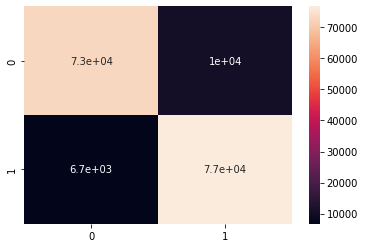

In [97]:
# Obtain the confusion matrix on test set
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True)

In [98]:
# classification report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     83604
           1       0.88      0.92      0.90     83474

    accuracy                           0.90    167078
   macro avg       0.90      0.90      0.90    167078
weighted avg       0.90      0.90      0.90    167078



XGBM has performed best in comparision to all other models till now.<BR>
Our precision and recall values have increased significantly. Given the recall values of Class 1 is more than 95% suggesting that there is less chances that potential customers will be missed.<BR>
F1-Scores have also improved to a greater extent suggesting improved performances.<BR>
Accuracy is close to 87%.<BR>
One drawback observed for this model was that model fitting was very time consuming.

In [99]:
# plotting for variable importance
features = ['Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage',
       'Policy_Sales_Channel', 'Vintage', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Age_1', 'Age_2',
       'Age_3', 'Age_4', 'Annual_Premium_0.0', 'Annual_Premium_1.0',
       'Annual_Premium_2.0', 'Annual_Premium_3.0']
importances = clf.best_estimator_.feature_importances_
indices = np.argsort(importances)


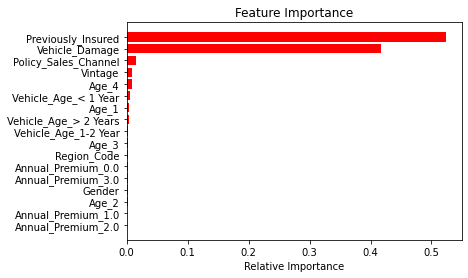

In [100]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

AUC: 0.980


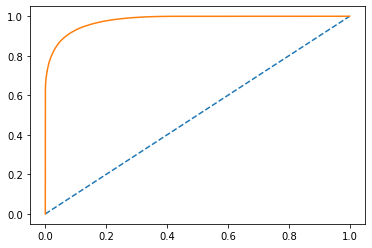

In [101]:
# AUC-ROC for training dataset
# predict probabilities
probs = clf.predict_proba(X_train)
# keeping probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.972


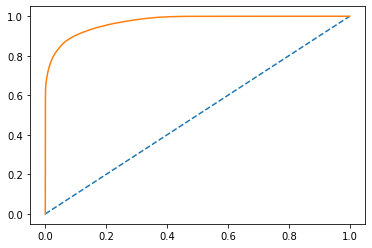

In [102]:
# AUC-ROC for test dataset
# predicting probablities
probs = clf.predict_proba(X_test)
#keeping probablities for positive outcomes only
probs = probs[:,1]
# calc AUC
auc = roc_auc_score(y_test,probs)
print("AUC: %.3f" % auc)
# calculate ROC curve
test_fpr,test_tpr, test_thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1], linestyle = '--')
# plot the roc curve of the model
plt.plot(test_fpr,test_tpr)


# Stacking
We will try to implement Stacking

In [103]:
# installing Stacking
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19878 sha256=64b609ce48e9475807438271925235a6ab4c2c3519ab1b363a5d8d75a25580f7
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [104]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 
from vecstack import stacking

In [105]:
# defining level 0 model
models = [ 
          LogisticRegression(C= 0.1, penalty= "l2", solver= "newton-cg"),
          RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=80),
          LGBMClassifier(bagging_fraction=0.5,learning_rate=0.1,n_estimators=100,max_bin=600,max_depth=10)
]

In [106]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]
    fold  0:  [0.79653334]
    fold  1:  [0.79895138]
    fold  2:  [0.79662911]
    fold  3:  [0.79644556]
    ----
    MEAN:     [0.79713985] + [0.00104790]
    FULL:     [0.79713985]

model  1:     [RandomForestClassifier]
    fold  0:  [0.81747374]
    fold  1:  [0.81936508]
    fold  2:  [0.81755355]
    fold  3:  [0.81776104]
    ----
    MEAN:     [0.81803835] + [0.00077313]
    FULL:     [0.81803835]

model  2:     [LGBMClassifier]
    fold  0:  [0.83826252]
    fold  1:  [0.83873336]
    fold  2:  [0.83968302]
    fold  3:  [0.83923612]
    ----
    MEAN:     [0.83897876] + [0.00053278]
    FULL:     [0.83897876]



In [107]:
# Level 1
model_stacking = XGBClassifier(random_state=0, n_jobs=1, learning_rate=0.1,
                      n_estimators=500, max_depth=10)

model_stacking = model_stacking.fit(S_train, y_train)

In [108]:
# Predictions
y_train_pred_stack = model_stacking.predict(S_train)
y_test_pred_stack = model_stacking.predict(S_test)

In [109]:
# accuracy scores for train set
accuracy_score(y_train,y_train_pred_stack)

0.8389787563443675

In [110]:
# accuracy scores for test set
accuracy_score(y_test,y_test_pred_stack)

0.8388596942745304

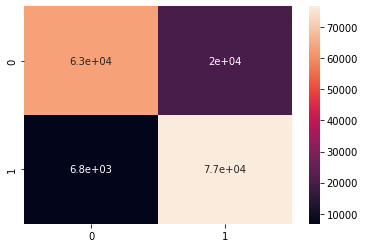

In [111]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred_stack),annot=True)

In [112]:
print(classification_report(y_test,y_test_pred_stack))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82     83604
           1       0.79      0.92      0.85     83474

    accuracy                           0.84    167078
   macro avg       0.85      0.84      0.84    167078
weighted avg       0.85      0.84      0.84    167078



At final stage we tried to implement Stacking. However, its result was on lower side when compared to XG Boost algorithm. F1-Scores can be observed to be balnaced though.

# Conclusions
From the above models, it was observed that our models were good fit and no underfitting or overfitting was observed in our data models.
<BR>
We tried to do Chi-square test to check the values of categorical data.
<BR>
XGBM was observed to provide better results in comparision to other models.
<BR>
It can be also stated that in all of our models, Recall values of Class 1 was observed to be good, it matters more for us as our primary concern should be that we should not be missing any our potential customers of Motor Insurance. 
<BR>
We tried to implement stacking with LGBM, Logistic Regression and Random Forest at Level 0 and XGBM at level 1. Overall the model provided good results.
<BR>
We plotted AUC-ROC graphs on our models based on Probablity using predict_proba<BR>
Our AUC scores based on Probablities was more than 94%.
